In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

#pull API data for global assessment, pseudo-random n = 10,000
response = requests.get("http://apiv3.iucnredlist.org/api/v3/species/region/europe/page/0?token=9bb4facb6d23f48efbf424bb05c0c1ef1cf6f468393bc745d42179ac4aca5fee")
Europe_assessment_species = response.json()
Europe_sample_species_df = pd.DataFrame(Europe_assessment_species["result"])
Europe_sample_species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   taxonid              10000 non-null  int64 
 1   kingdom_name         10000 non-null  object
 2   phylum_name          10000 non-null  object
 3   class_name           10000 non-null  object
 4   order_name           10000 non-null  object
 5   family_name          10000 non-null  object
 6   genus_name           10000 non-null  object
 7   scientific_name      10000 non-null  object
 8   taxonomic_authority  9992 non-null   object
 9   infra_rank           83 non-null     object
 10  infra_name           83 non-null     object
 11  population           0 non-null      object
 12  category             10000 non-null  object
 13  main_common_name     4227 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [2]:
Europe_sample_species_df

,taxonid,kingdom_name,phylum_name,class_name,order_name,family_name,genus_name,scientific_name,taxonomic_authority,infra_rank,infra_name,population,category,main_common_name
0,59,ANIMALIA,MOLLUSCA,GASTROPODA,STYLOMMATOPHORA,VALLONIIDAE,Acanthinula,Acanthinula spinifera,"Mousson, 1872",None,None,None,DD,None
1,81,ANIMALIA,CHORDATA,ACTINOPTERYGII,SALMONIFORMES,SALMONIDAE,Salmo,Salmo ohridanus,"Steindachner, 1892",None,None,None,VU,None
2,215,ANIMALIA,MOLLUSCA,GASTROPODA,ARCHITAENIOGLOSSA,ACICULIDAE,Acicula,Acicula norrisi,"E. Gittenberger &amp; Boeters, 1977",None,None,None,VU,None
3,217,ANIMALIA,MOLLUSCA,GASTROPODA,ARCHITAENIOGLOSSA,ACICULIDAE,Acicula,Acicula hausdorfi,"Boeters, Gittenberger &amp; Subai, 1989",None,None,None,NT,None
4,224,ANIMALIA,CHORDATA,ACTINOPTERYGII,ACIPENSERIFORMES,ACIPENSERIDAE,Acipenser,Acipenser naccarii,"Bonaparte, 1836",None,None,None,CR,Adriatic Sturgeon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19199083,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,MEGACHILIDAE,Hoplitis,Hoplitis annulata,"(Latreille, 1811)",None,None,None,LC,None
9996,19199084,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,MEGACHILIDAE,Stelis,Stelis signata,"(Latreille, 1809)",None,None,None,LC,None
9997,19199085,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,MEGACHILIDAE,Coelioxys,Coelioxys rufescens,"Lepeletier & Audinet-Serville, 1825",None,None,None,LC,None
9998,19199086,ANIMALIA,ARTHROPODA,INSECTA,HYMENOPTERA,HALICTIDAE,Sphecodes,Sphecodes longuloides,"Blüthgen, 1923",None,None,None,DD,None


In [3]:
#clean up data, "category" has some sub-categories that we will merge into a single category
Europe_sample_species_df['category'].replace({'LR/cd': 'CD', 'LR/lc': 'LC', 'LR/nt' : 'NT'}, inplace=True)
Europe_sample_species_df['category'].unique()

array(['DD', 'VU', 'NT', 'CR', 'EN', 'LC', 'NA', 'EX', 'RE', 'EW'],
      dtype=object)

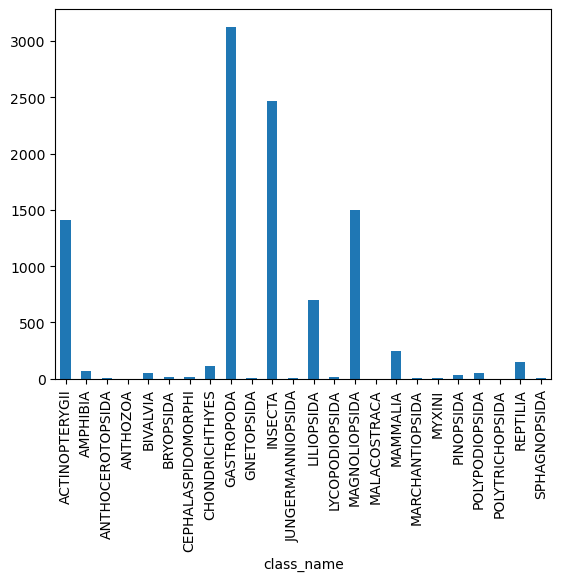

In [7]:
classes_count_Europe_sample = Europe_sample_species_df.groupby("class_name").count()
classes_plot = classes_count_Europe_sample["taxonid"].plot(kind = 'bar')

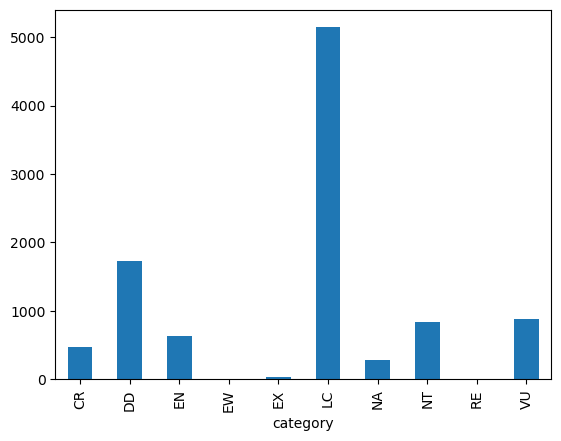

In [8]:
categories_count_Europe_sample = Europe_sample_species_df.groupby("category").count()
categories_plot = categories_count_Europe_sample["taxonid"].plot(kind = 'bar')

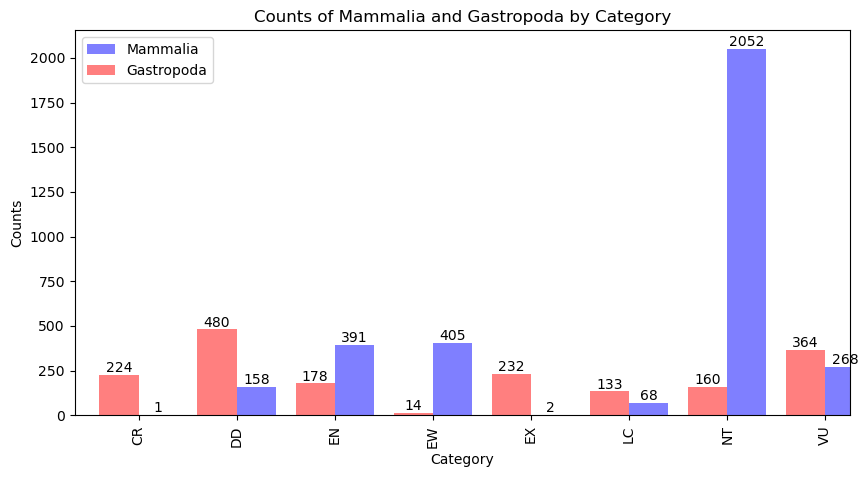

In [64]:
insecta = Europe_sample_species_df[Europe_sample_species_df["class_name"] == "INSECTA"]
counts_insecta = insecta.groupby('category').count()['taxonid']

gastropoda = Europe_sample_species_df[Europe_sample_species_df["class_name"] == "GASTROPODA"]
counts_gastropoda = gastropoda.groupby('category').count()['taxonid']

fig, ax = plt.subplots(figsize=(10, 5))
classes_category_plot = counts_insecta.plot(kind='bar', color='blue', alpha=0.5, position=0, width=0.4)
counts_gastropoda.plot(kind='bar', color='red', alpha=0.5, position=1, width=0.4, ax=classes_category_plot)
classes_category_plot.set_xlabel('Category')
classes_category_plot.set_ylabel('Counts')
classes_category_plot.legend(['Insecta', 'Gastropoda'])
classes_category_plot.set_title('Counts of Insecta and Gastropoda by Category')
for i in classes_category_plot.containers:
    classes_category_plot.bar_label(i, label_type='edge', fontsize=10)
    
plt.savefig('classes_counts_of_categories.png')

In [44]:
#check number of values in kingdom_name
Europe_sample_species_df['kingdom_name'].unique()

array(['ANIMALIA', 'PLANTAE'], dtype=object)